# Random Forest Assignment

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_csv("Company_Data.csv")

## Data Understanding

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.shape

(400, 11)

In [5]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


## Converting a categorical data into numerical data using Label Encoding

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [8]:
LabelEncoder = preprocessing.LabelEncoder()
df['ShelveLoc'] = LabelEncoder.fit_transform(df['ShelveLoc'])
df['Urban'] = LabelEncoder.fit_transform(df['Urban'])
df['US'] = LabelEncoder.fit_transform(df['US'])

In [9]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


## Splitting a data into features and target

In [11]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [14]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [15]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [17]:
X_train.shape, y_train.shape

((300, 10), (300,))

In [18]:
X_test.shape, y_test.shape

((100, 10), (100,))

## Since target variable is continous, we will use Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
RFReg = RandomForestRegressor(n_estimators = 50, random_state = 42)

In [20]:
RFReg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [21]:
y_pred = RFReg.predict(X_test)

In [22]:
from sklearn import metrics

In [23]:
r_square = metrics.r2_score(y_test, y_pred)

In [24]:
r_square

0.6840213643363777

## Accuracy of model is 68.40%

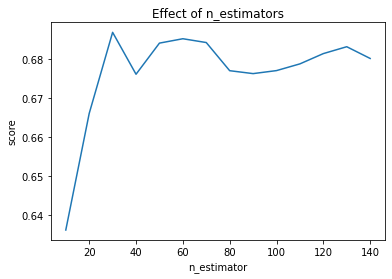

In [25]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 150, 10)
scores = []
for n in estimators:
    RFReg.set_params(n_estimators=n)
    RFReg.fit(X_train, y_train)
    scores.append(RFReg.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

# Accuracy is good for number of estimators(trees) in between 30 to 70